## Оценка эффекта от внедрения полученного решения

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%pylab inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 7, 5
plt.rcParams['axes.grid'] = True
mpl.rcParams['font.family'] = 'Ubuntu'
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
# чтобы был русский шрифт
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


C:\Users\swink_000\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Оценка потенциального экономического эффекта от внедрения полученного решения

1) Введем следующие параметры в модель оценки внедрения решения на платформе:
* Кол-во денег, которое приносит пользователь в месяц - CustomerYield(CY)
* Кол-во денег, которое мы будем вкладывать в его удержание - OnCustomerSpendings(OCS)
* Какова вероятность, что предложение будет принято им - ProbabilityOfAcceptance(PoA)
* На кого будет расчитана компания по удержанию

In [8]:
np.random.normal(1000, 1000**0.05)

1000.1880861818863

Определим парметры модели:
* CY = 1000
* OCS = 25
* PoA = 60%
* Компания рассчитана на пользователей склонных к оттоку, которых верно определила модель -ActualChurnCustomers(ACC)
* Все пользователи, кого модель пометила как отрицательных - ModelChurnCustomers(MCC)

Экономический эффект - прибыль/убыток от проведения компании(Result)

Если Result > 0, то прибыль, < 0 - убыток.

Модель расчета экономического эффекта на следующий месяц:

$Result = PoA * ACC * (CY + N(CY,\sqrt {CY})) - OCS * MCC$

Рассмотрим результаты расчета метрик финальной модели на отложенной выборке:
* Roc-auc = 0.68
* Recall = 0.64
* Precision = 0.14
* Confusion Matrix:
\begin{vmatrix}
4624 & 2755\\
165 &  456\\
\end{vmatrix}

Получается, вероятность того, что случайно выбранный из предсказанной моделью выборки объект -1 с вероятностью 14% окажется отточным пользователем. Такая низкая вероятность обуславливается сильной несбалансированностью выборки. В тоже время, без модели, вероятность правильно предсказать, каким является выбранный объект составляла 7%. 

In [2]:
#функция профита
def profitFunction(MCC = 3211, modelPrecision = 0.14, CY = 1000, OCS = 25, PoA = 0.6):
    ACC = MCC*modelPrecision
    profit = PoA*ACC*(CY + np.random.normal(CY,CY**0.5)) - OCS*MCC
    return profit

Найдем оптимальное количество пользователей для максимального профита

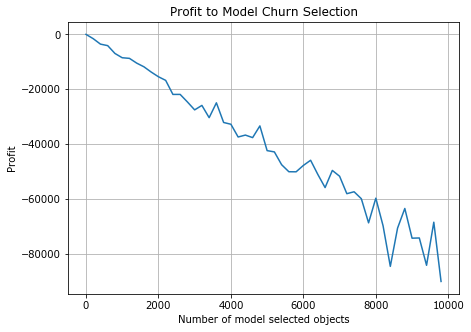

In [3]:
modelSelectedPoints = range(0, 10000, 200)
profit = [profitFunction(MCC = i, CY = 100) for i in modelSelectedPoints]
plt.plot(modelSelectedPoints, profit)

plt.title("Profit to Model Churn Selection")
plt.xlabel("Number of model selected objects")
plt.ylabel("Profit")

Как видно из рисунка, увеличение количества объектов ведет к разорению. Это свидетельствует от том, что стоит повысить параметр дохода, который клиенты приносят компании(или снизить размер вложений в клиента).

3) Рассмотрим, как влияет вероятность, что пользователь примет наше предложение, на профит

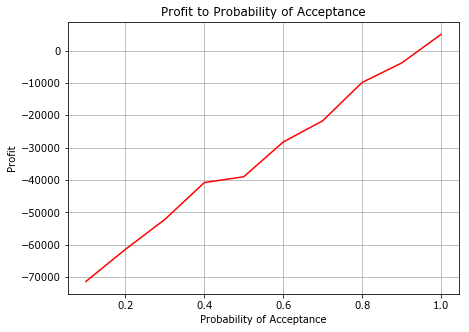

In [10]:
probOfAccp = list(np.linspace(0.1, 1, 10))
profit = [profitFunction(PoA = i, CY = 100) for i in probOfAccp]
plt.plot(probOfAccp, profit, 'r')

plt.title("Profit to Probability of Acceptance")
plt.xlabel("Probability of Acceptance")
plt.ylabel("Profit")

Модель линейна, значит и при более активных мерах удержания, можно увеличить профит от него.

4) Как видно из предыдущих графиков, применение модели становится не убыточно при условии, что клиент приносит значительно большую прибыль, чем на него тратятся. На самом деле, учитывая размер признакового пространства и очень маленький процент оттока, это данные такой организации, где клиенты приносят достаточно много дохода. Дальше сделаем CY = 1000.

5) Оценим изменение экономического эффекта при изменениях метрики качества(тут метрика precision)

In [6]:
print "At modelPrecision = 0.14, profit = {}".format(profitFunction(MCC = 3211, modelPrecision = 0.07,
                                                                    CY = 1000, OCS = 25, PoA = 0.6))
print "At modelPrecision = 0.15, profit = {}".format(profitFunction(MCC = 3211, modelPrecision = 0.14,
                                                                    CY = 1000, OCS = 25, PoA = 0.6))
print "At modelPrecision = 0.15, profit = {}".format(profitFunction(MCC = 3211, modelPrecision = 0.15,
                                                                    CY = 1000, OCS = 25, PoA = 0.6))
print "At modelPrecision = 0.17, profit = {}".format(profitFunction(MCC = 3211, modelPrecision = 0.17,
                                                                    CY = 1000, OCS = 25, PoA = 0.6))

At modelPrecision = 0.14, profit = 193990.409634
At modelPrecision = 0.15, profit = 459914.885544
At modelPrecision = 0.15, profit = 495173.022468
At modelPrecision = 0.17, profit = 569347.074932


6) Улучшение качества на 3% может принести компании почти 125000$ при заданных начальных параметрах, в данном случае это действительно оправданно вкладывать деньги в улучшение модели, так как это позволит компании зарабатывать значительно больше денег каждый месяц при успешном проведении компании по удерживанию клиентов.